In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.linear_model import Ridge
from sklearn import datasets, ensemble
import statsmodels.api as sm
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data["volume"] = train_data['x'] * train_data['y'] * train_data['z'] * 2 / 3
test_data["volume"] = test_data['x'] * test_data['y'] * test_data['z'] * 2 / 3

In [4]:
train_data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,117.655560
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,164.643864
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,35.295582
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,57.615228
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,76.876800


<ipython-input-5-6d8d3d5a89a2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, linewidths=.5, ax=ax)


<Axes: >

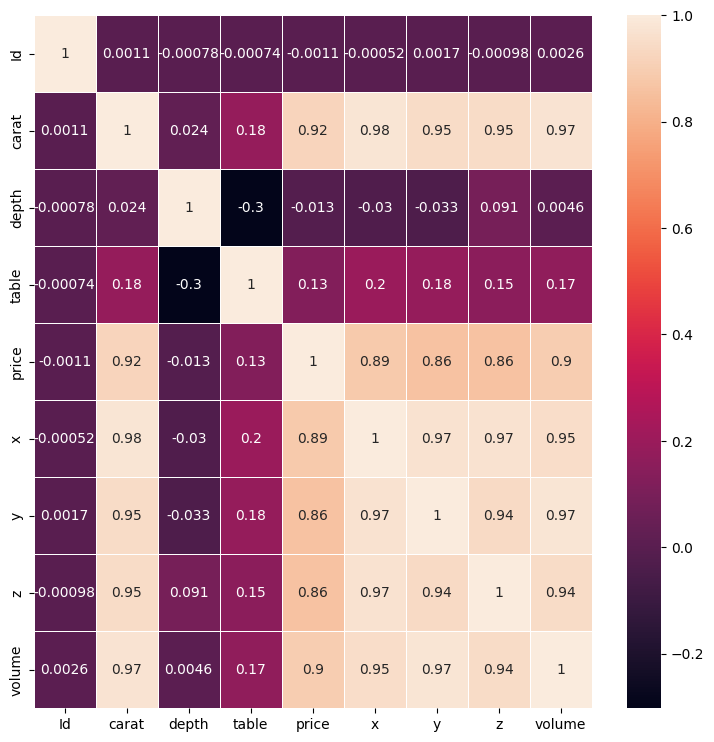

In [5]:
fig, ax = plt.subplots(figsize=(9 ,9
))         # Sample figsize in inches
sns.heatmap(train_data.corr(), annot=True, linewidths=.5, ax=ax)

In [6]:
encoder = OneHotEncoder(handle_unknown='ignore')
#cut encoding
#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(train_data[['cut']]).toarray())

#merge one-hot encoded columns back with original DataFrame
train_data_v1 = train_data.join(encoder_df)

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(test_data[['cut']]).toarray())

#merge one-hot encoded columns back with original DataFrame
test_data_v1 = test_data.join(encoder_df)

In [7]:
#clarity encoding
#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(train_data[['clarity']]).toarray())

#merge one-hot encoded columns back with original DataFrame
train_data_v2 = train_data.join(encoder_df)

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(test_data[['clarity']]).toarray())

#merge one-hot encoded columns back with original DataFrame
test_data_v2 = test_data.join(encoder_df)

In [8]:
#dropping unnecessary columns
#drop 'team' column
train_data_v3 = train_data_v2.drop(
    ['cut', 'clarity', 'x', 'y', 'z', 'color', 'depth', 'Id'], axis=1, inplace=False)
test_data_v3 = test_data_v2.drop(
    ['cut', 'clarity', 'x', 'y', 'z', 'color', 'depth', 'Id'], axis=1, inplace=False)

In [9]:
train_data_v3.describe()

,carat,table,price,volume,0,1,2,3,4,5,6,7
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,57.458347,3929.491912,86.568370,0.014043,0.033417,0.241657,0.172228,0.150051,0.227660,0.067297,0.093646
std,0.473594,2.233904,3985.527795,52.414266,0.117671,0.179724,0.428093,0.377583,0.357126,0.419327,0.250539,0.291339
min,0.200000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,947.750000,43.423772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,57.000000,2401.000000,76.554835,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,59.000000,5312.000000,113.896260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,95.000000,18823.000000,2560.398707,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='table', ylabel='Density'>

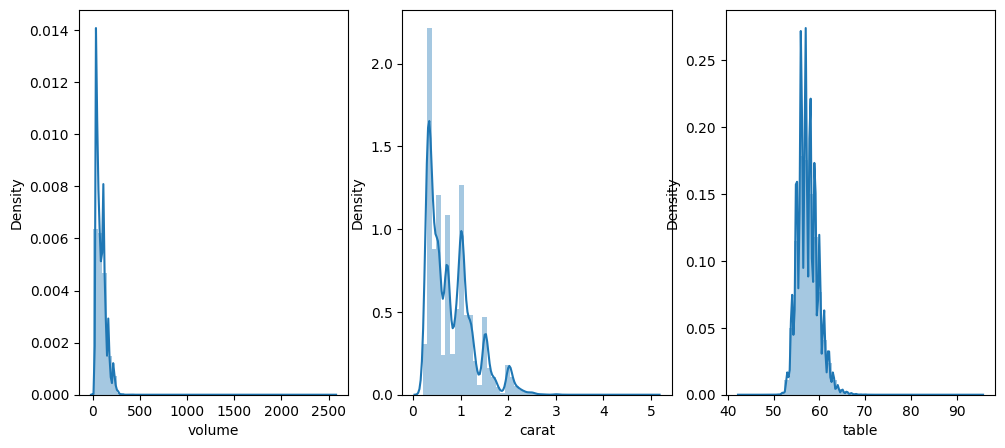

In [10]:
#now lets tend to the outliers
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
sns.distplot(train_data_v3['volume'])
plt.subplot(1,4,2)
sns.distplot(train_data_v3['carat'])
plt.subplot(1,4,3)
sns.distplot(train_data_v3['table'])


In [11]:
print("Highest allowed for volume",str(train_data_v3['volume'].mean() + 3*train_data_v3['volume'].std()))

Highest allowed for volume 243.81116873020162


In [12]:
print("Highest allowed for carat",str(train_data_v3['carat'].mean() + 3*train_data_v3['carat'].std()))

Highest allowed for carat 2.218635891857435


In [13]:
print("Highest allowed for volume",str(train_data_v3['table'].mean() + 3*train_data_v3['table'].std()))
print("Lowest allowed for volume",str(train_data_v3['table'].mean() - 3*train_data_v3['table'].std()))

Highest allowed for volume 64.1600587621826
Lowest allowed for volume 50.756635713160385


In [14]:
outliers = train_data_v3[(train_data_v3['volume'] > 243.8) | (train_data_v3['carat'] > 2.21)]

In [15]:
train_data_v3 = train_data_v3[(train_data_v3['volume'] < 242) | (train_data_v3['carat'] < 2.21)]
train_data_v3 = train_data_v3[(train_data_v3['table'] < 64) | (train_data_v3['table'] > 50)]
train_data_v3.describe()

,carat,table,price,volume,0,1,2,3,4,5,6,7
count,42843.000000,42843.000000,42843.000000,42843.000000,42843.000000,42843.000000,42843.000000,42843.000000,42843.000000,42843.000000,42843.000000,42843.000000
mean,0.785725,57.453652,3846.768994,85.263296,0.013234,0.033634,0.242210,0.169456,0.150806,0.228555,0.067782,0.094321
std,0.452331,2.232515,3871.598157,50.216448,0.114278,0.180288,0.428426,0.375158,0.357864,0.419907,0.251375,0.292278
min,0.200000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,945.000000,43.259701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,57.000000,2380.000000,76.303250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,59.000000,5233.000000,113.093067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.800000,95.000000,18818.000000,2560.398707,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
Y_train = train_data_v3['price'].values
X_train = train_data_v3.drop(['price'],axis = 1).values
X_test = test_data_v3.values

In [17]:
train_data_v3.head()

,carat,table,price,volume,0,1,2,3,4,5,6,7
0,1.06,57.0,4270,117.655560,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.51,58.0,15164,164.643864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.32,56.0,828,35.295582,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.53,56.0,1577,57.615228,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.70,57.0,2596,76.876800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
#normalizing data
minmaxScaler = MinMaxScaler()
X_train_normalized = minmaxScaler.fit_transform(X_train)
X_test_normalized = minmaxScaler.transform(X_test)

In [24]:
#linear regression
linearRegression = linear_model.LinearRegression()
linearRegression.fit(X_train_normalized, Y_train)

LinearRegression()

In [25]:
linearRegression.score(X_train_normalized, Y_train)

0.8949405438953004

In [26]:
pricing_predictions = linearRegression.predict(X_train_normalized)
lin_mse = mean_squared_error(pricing_predictions, Y_train)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1254.8816825127942


In [28]:
scores = cross_val_score(linearRegression, X_train_normalized, Y_train, cv = 10)
rmse_cv = np.sqrt(scores)
rmse_cv

array([0.94704963, 0.9460309 , 0.94448409, 0.94580413, 0.94657061,
       0.94309421, 0.94541135, 0.94754941, 0.94167318, 0.94751529])

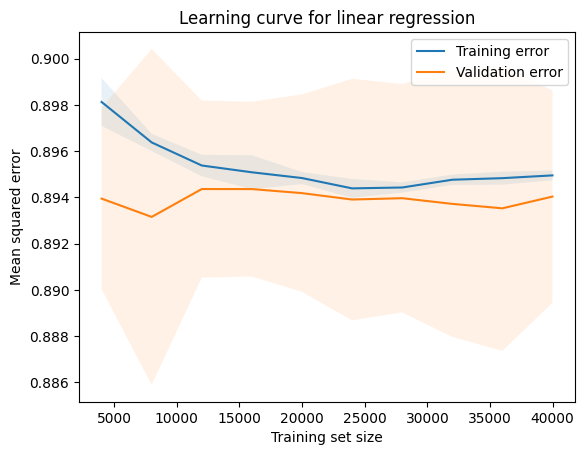

In [31]:
# Define different training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(LinearRegression, X_train_normalized, Y_train, train_sizes=train_sizes, cv=15)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, label='Training error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Validation error')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve for linear regression')
plt.legend()
plt.show()

In [32]:
#now we try something that has regularization
lassoRegression = Lasso()
lassoRegression.fit(X_train_normalized, Y_train)

Lasso()

In [33]:
pricing_predictions = lassoRegression.predict(X_train_normalized)
lin_mse = mean_squared_error(pricing_predictions, Y_train)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1255.3601140929004


In [34]:
scores = cross_val_score(lassoRegression, X_train_normalized, Y_train, cv = 10)
rmse_cv = np.sqrt(scores)
rmse_cv

array([0.94698265, 0.9459553 , 0.94440306, 0.94574657, 0.94648087,
       0.94310182, 0.94542501, 0.94745952, 0.94584778, 0.94745316])

In [35]:
param_grid = {'alpha': [0.1, 1, 10, 100]}
gscv = GridSearchCV( \
    lassoRegression, param_grid, cv=10)
results = gscv.fit(X_train_normalized, Y_train)
print('MAE: %.5f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: 0.89473
Config: {'alpha': 0.1}


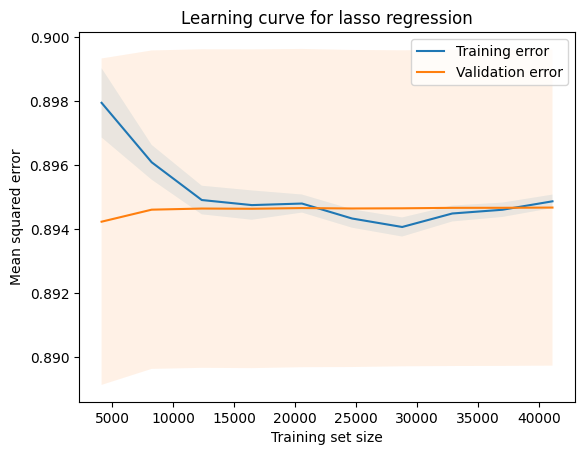

In [36]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(lassoRegression, X_train_normalized, Y_train, train_sizes=train_sizes, cv=25)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, label='Training error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Validation error')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve for lasso regression')
plt.legend()
plt.show()

In [37]:
#another regression model with regularization
ridgeRegression = Ridge()
ridgeRegression.fit(X_train_normalized, Y_train)

Ridge()

In [38]:
pricing_predictions = ridgeRegression.predict(X_train_normalized)
lin_mse = mean_squared_error(pricing_predictions, Y_train)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1254.8936939124612


In [39]:
scores = cross_val_score(ridgeRegression, X_train_normalized, Y_train, cv = 10)
rmse_cv = np.sqrt(scores)
rmse_cv

array([0.94703278, 0.94602829, 0.9444683 , 0.94579706, 0.94655222,
       0.94311   , 0.94543189, 0.94753607, 0.94562167, 0.94751111])

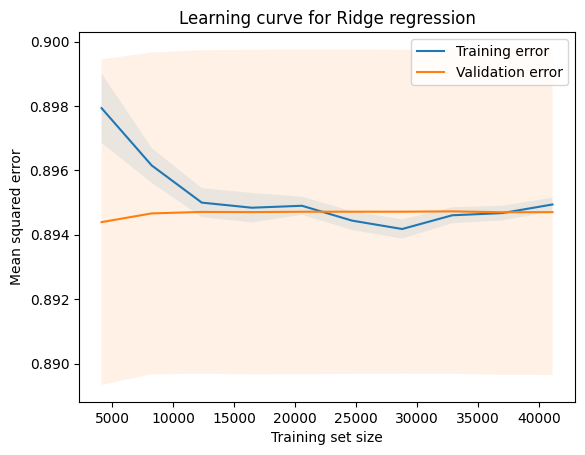

In [40]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(ridgeRegression, X_train_normalized, Y_train, train_sizes=train_sizes, cv=25)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, label='Training error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Validation error')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve for Ridge regression')
plt.legend()
plt.show()

In [41]:
#Random forest tree
Reg_forest = RandomForestRegressor()
Reg_forest.fit(X_train_normalized, Y_train)

RandomForestRegressor()

In [42]:
Reg_forest.score(X_train_normalized, Y_train)

0.9913206501158766

In [43]:
pricing_predictions = Reg_forest.predict(X_train_normalized)
lin_mse = mean_squared_error(pricing_predictions, Y_train)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

360.68560003771285


In [44]:
scores = cross_val_score(Reg_forest, X_train_normalized, Y_train, cv = 10)
rmse_cv = np.sqrt(scores)
rmse_cv

array([0.96795187, 0.96922439, 0.96646264, 0.97029744, 0.9688112 ,
       0.96522232, 0.96755031, 0.97209323, 0.9704661 , 0.96905421])

In [47]:
#Decision Tree Regressor
Tree_Reg = DecisionTreeRegressor()
Tree_Reg.fit(X_train_normalized, Y_train)

DecisionTreeRegressor()

In [48]:
Tree_Reg.score(X_train_normalized, Y_train)

0.9997887409167776

In [49]:
pricing_predictions = Tree_Reg.predict(X_train_normalized)
lin_mse = mean_squared_error(pricing_predictions, Y_train)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

56.27207130603851


In [50]:
scores = cross_val_score(Tree_Reg, X_train_normalized, Y_train, cv = 10)
rmse_cv = np.sqrt(scores)
rmse_cv

array([0.94587402, 0.9515006 , 0.94611594, 0.95311296, 0.95523004,
       0.94452604, 0.94701191, 0.94994394, 0.95203693, 0.94979172])

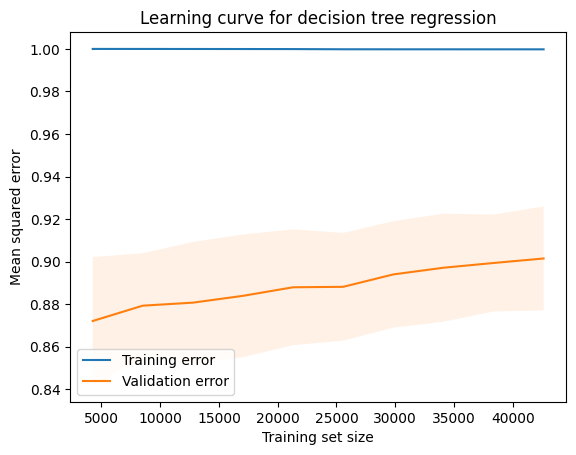

In [52]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(Tree_Reg, X_train_normalized, Y_train, train_sizes=train_sizes, cv=200)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_mean, label='Training error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Validation error')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.title('Learning curve for decision tree regression')
plt.legend()
plt.show()




In [53]:
# Define the parameter grid for tuning
param_grid = {'alpha': [0.1, 1, 10, 100],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
              'positive': [True, False],
              'max_iter': [100, 200, None]}
grid_search = GridSearchCV(estimator=ridgeRegression, param_grid=param_grid, cv=10)
grid_search.fit(X_train_normalized, Y_train)
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'alpha': 0.1, 'max_iter': 100, 'positive': False, 'solver': 'lsqr'}
Best score: 0.8947747683326108


In [54]:
params = {
    "n_estimators": 700,
    "max_depth": 7,
    "min_samples_split": 7,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train_normalized, Y_train)

pricing_predictions = reg.predict(X_train_normalized)

lin_mse = mean_squared_error(pricing_predictions, Y_train)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

859.5636244749422

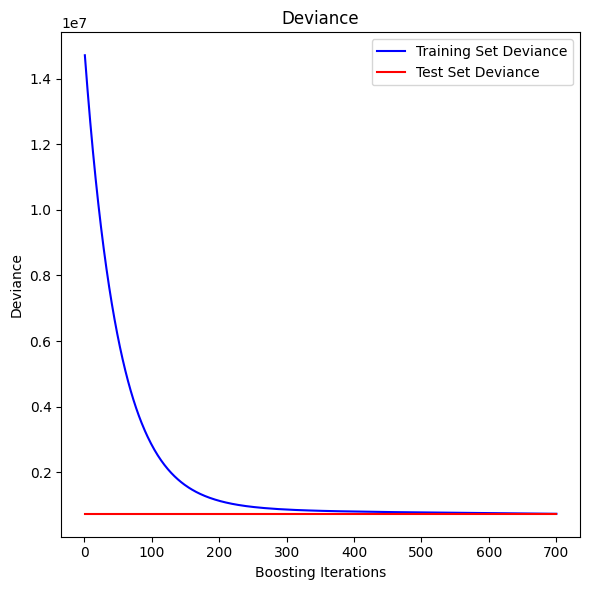

In [55]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_train_normalized)):
    test_score[i] = mean_squared_error(Y_train, pricing_predictions)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [93]:
predictions = reg.predict(X_test_normalized)

In [94]:
submission = test_data[["Id"]]

In [95]:
submission['price'] = predictions

In [96]:
submission.head()

,Id,price
0,1,1725.707029
1,2,2189.893897
2,3,1892.445028
3,4,3364.277387
4,5,1420.143990


In [97]:
submission.to_csv("submissionsvr.csv", index=None)